In [1]:
os.getcwd()

'/home/seun-ajayi/Project_4'

In [181]:
import json

In [4]:
with open('config.json','r') as f:
    config = json.load(f) 

input_folder_path = config['input_folder_path']
output_folder_path = config['output_folder_path']

In [182]:
import os

In [7]:
ab = os.getcwd()+"/"+input_folder_path
ab

'/home/seun-ajayi/Project_4/practicedata'

In [37]:
filenames = os.listdir(os.getcwd()+"/"+input_folder_path)
filenames

['dataset2.csv', 'dataset1.csv', 'Icon_']

In [183]:
import glob

In [24]:
glob("da*")

TypeError: 'module' object is not callable

In [ ]:
import re

In [21]:
for filename in filenames:
    if str(filename).contains(".csv"):
        print(filename)

AttributeError: 'str' object has no attribute 'contains'

In [30]:
from glob import glob

In [35]:
filenames = glob(f"{filenames}*")

In [36]:
filenames

['app.py',
 'check.ipynb',
 'apicalls.py',
 'sourcedata',
 'config.json',
 '__MACOSX',
 'diagnostics.py',
 'scoring.py',
 'deployment.py',
 'testdata',
 'training.py']

In [41]:
for filename in sorted(glob(f'{input_folder_path}/*.csv')):
       print(os.getcwd()+"/"+filename)

/home/seun-ajayi/Project_4/practicedata/dataset1.csv
/home/seun-ajayi/Project_4/practicedata/dataset2.csv


In [42]:
OUTPUT_FOLDER = os.makedirs(output_folder_path, exist_ok=True)
OUTPUT_FOLDER

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv("/home/seun-ajayi/Project_4/practicedata/dataset1.csv")

In [51]:
OUTPUT_DIR = os.path.join(os.getcwd(), output_folder_path)
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [52]:
df.to_csv(f"{OUTPUT_DIR}/merged_dataset.csv", index=False)

In [185]:
with open('config.json','r') as f:
    config = json.load(f) 

dataset_csv_path = os.path.join(config['output_folder_path']) 

In [187]:
data_filename = os.listdir(os.getcwd()+"/"+dataset_csv_path)

In [194]:
data_filename[1]

'merged_dataset.csv'

In [195]:

data = pd.read_csv(os.getcwd()+"/"+dataset_csv_path+"/"+data_filename[1])

In [196]:
data.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,nciw,100,1359,1,0
1,lsid,68,282,14,0
2,pwls,71,949,40,1
3,bqlx,686,3782,103,0
4,zmei,45,655,7,0


In [197]:
y = data["exited"]
X = data.drop(columns=["exited"], axis=1)

In [60]:
y

0     0
1     0
2     1
3     0
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    1
14    1
15    1
16    0
17    1
18    0
19    0
20    1
21    1
22    0
23    1
24    1
25    0
Name: exited, dtype: int64

In [92]:
X_


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
from sklearn.preprocessing import OneHotEncoder

In [177]:
one = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [198]:
X_cat = X["corporation"].values
X_cat.reshape(-1,1)

array([['nciw'],
       ['lsid'],
       ['pwls'],
       ['bqlx'],
       ['zmei'],
       ['wosl'],
       ['xcvb'],
       ['dfgh'],
       ['ngrd'],
       ['xful'],
       ['kshe'],
       ['qqqq'],
       ['corp'],
       ['ekci'],
       ['dosk'],
       ['endi'],
       ['gudj'],
       ['abcd'],
       ['asdf'],
       ['xyzz'],
       ['acme'],
       ['qwer'],
       ['tyui'],
       ['zxcv'],
       ['hjkl'],
       ['lmno']], dtype=object)

In [199]:
X_= one.fit_transform(X_cat.reshape(-1,1))

In [200]:
X_con = X.drop(["corporation"], axis=True)

In [201]:
X_final = np.concatenate([X_con, X_], axis=1)

In [318]:
LogisticRegression??

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Source:        
class LogisticRegression(LinearClassifierMixin, SparseCoefMixin, BaseEstimator):
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    that reg

In [203]:
X_final.tolist()

[[100.0,
  1359.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [68.0,
  282.0,
  14.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [71.0,
  949.0,
  40.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [686.0,
  3782.0,
  103.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [45.0,
  655.0,
  7.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [207]:
json.loads(X_json)

[[100.0,
  1359.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [68.0,
  282.0,
  14.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [71.0,
  949.0,
  40.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [686.0,
  3782.0,
  103.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [45.0,
  655.0,
  7.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [206]:
X_json = json.dumps(X_final.tolist())

In [213]:
X_json

'[[100.0, 1359.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [68.0, 282.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 949.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [686.0, 3782.0, 103.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [45.0, 655.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 18.0, 21.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [189.0, 961.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [214]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='multinomial', n_jobs=None, penalty='l2',
                    random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)
    
#fit the logistic regression to your data
model = lr.fit(X_final, y)

In [224]:
from training import preprocess_data
from scoring import load_model

In [225]:
encoder = load_model(modelfile="encoder.pkl")

In [226]:
X_test1, *_ = preprocess_data(datapath=dataset_csv_path, training=False, encoder=encoder)

In [231]:
preds = model.predict(X_test1)

In [238]:
type(preds[0])

numpy.int64

In [233]:
preds1 = [float(x) for x in list(preds)]

In [237]:
type(preds1[0])

float

In [229]:
X_json1 = json.dumps(X_test1.tolist())

In [230]:
X_json1

'[[100.0, 1359.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [68.0, 282.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [71.0, 949.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [686.0, 3782.0, 103.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [45.0, 655.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 18.0, 21.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [189.0, 961.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [223]:
X_json['data']

TypeError: string indices must be integers

In [216]:
model.predict(json.loads(X_json))

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [219]:
from flask import request

In [218]:
pd.DataFrame(json.loads(X_json))

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,100.0,1359.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,68.0,282.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71.0,949.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,686.0,3782.0,103.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45.0,655.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,18.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,189.0,961.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,16.0,1028.0,33.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,67.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [314]:
log = lr.fit(check1, y)

In [ ]:
preds = log.predict(check)

In [127]:
preds = model.score(X_final,y)

In [128]:
preds

0.9230769230769231

In [131]:
model.predict(X_final)

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [132]:
abc = "abc"

In [133]:
cde = "cde"

In [136]:
x = abc+"/"+cde
x

'abc/cde'

In [137]:
datafiles = glob(f"{os.path.join(os.getcwd(), dataset_csv_path)}/*.csv")

In [138]:
datafiles

['/home/seun-ajayi/Project_4/ingesteddata/merged_dataset.csv']

In [141]:
df = pd.read_csv(datafiles[0])

In [148]:
with open('config.json','r') as f:
    config = json.load(f) 

model_scores_path = os.path.join(config['model_scores_path']) 

In [165]:
df = pd.DataFrame(columns=["metric", "version", "score"])

In [166]:
newrow = {"metric": "f1", "version": 0, "score": 0}

In [167]:
df = df.append(newrow, ignore_index=True)

/tmp/ipykernel_1125/4285175607.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(newrow, ignore_index=True)


In [168]:
df

,metric,version,score
0,f1,0,0


In [169]:
df.to_csv(f"{model_scores_path}/modelscores.csv", index=False)

In [170]:
f1score = 0.05

In [171]:
filepath = os.path.join(os.getcwd(), model_scores_path, "modelscores.csv")
previousscores = pd.read_csv(filepath)
maxversion=previousscores['version'].max()
thisversion=maxversion+1
new_row_f1 = {'metric':'f1score', 'version':thisversion, 'score':f1score}
if f1score<previousscores.loc[previousscores['metric']=='f1score','score'].min():
    previousscores = previousscores.append(new_row_f1, ignore_index=True)
    # previousscores.head()
    previousscores.to_csv(filepath, index=False)

In [172]:
previousscores.head()

,metric,version,score
0,f1,1,0.9375


In [173]:
thisversion

2

In [174]:
f1score

0.05

In [182]:
previousscores.loc[previousscores['metric']=='f1', "score"].min()

0.9375

In [183]:
import shutil

In [184]:
shutil.copy()

TypeError: copy() missing 2 required positional arguments: 'src' and 'dst'

In [185]:
model

LogisticRegression(multi_class='multinomial', random_state=0)

In [186]:
preds = model.predict(X_final)

In [188]:
list(preds)

[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]

In [191]:
import  subprocess

In [192]:
outdated =  subprocess.check_output(["pip", "list", "--outdated"]).check_output(["pip", "list", "--outdated"])

AttributeError: 'bytes' object has no attribute 'check_output'

In [201]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [194]:
confusion_matrix(y, preds)

array([[ 9,  2],
       [ 0, 15]])

In [197]:
import matplotlib.pyplot as plt

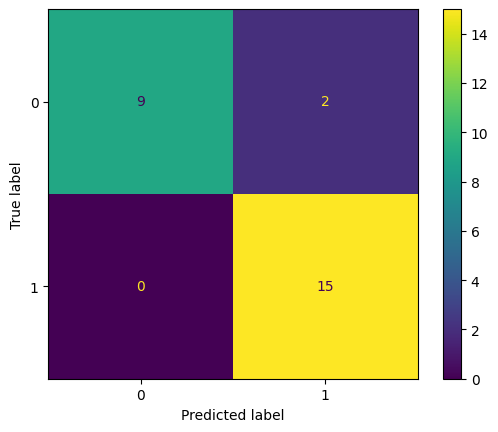

In [210]:
plot_confusion_matrix(model, X_final, y);

In [202]:
classification_report(y, preds)

'              precision    recall  f1-score   support\n\n           0       1.00      0.82      0.90        11\n           1       0.88      1.00      0.94        15\n\n    accuracy                           0.92        26\n   macro avg       0.94      0.91      0.92        26\nweighted avg       0.93      0.92      0.92        26\n'

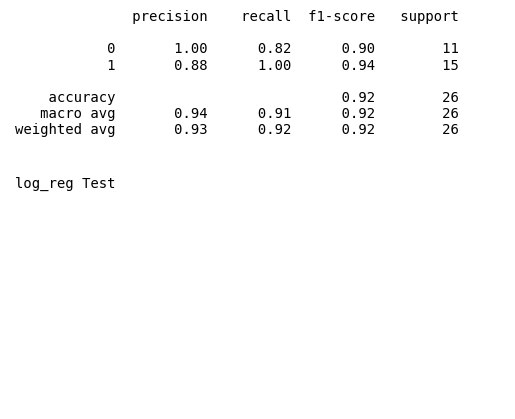

In [204]:
plt.text(0.01, 0.6, str(f'log_reg Test'), {
        'fontsize': 10}, fontproperties='monospace')
plt.text(0.01, 0.7, str(classification_report(y, preds)), {
    'fontsize': 10}, fontproperties='monospace')  # approach improved by OP -> monospace!
plt.axis('off');

In [205]:
from diagnostics import model_predictions   

In [206]:
preds = model_predictions(model, X_final)

In [207]:
confusion_matrix(y, preds)

array([[ 9,  2],
       [ 0, 15]])

In [211]:
df.head()

,metric,version,score
0,f1,0,0


In [212]:
data.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,nciw,100,1359,1,0
1,lsid,68,282,14,0
2,pwls,71,949,40,1
3,bqlx,686,3782,103,0
4,zmei,45,655,7,0


In [215]:
data.mean(axis=1)

/tmp/ipykernel_1125/561826174.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean(axis=1)


0      365.00
1       91.00
2      265.25
3     1142.75
4      176.75
5       10.00
6      292.25
7      269.25
8       14.00
9       20.50
10     264.25
11     178.50
12     887.75
13      46.25
14     147.25
15     239.25
16     486.00
17     278.75
18     544.75
19    1027.00
20    2771.75
21      40.25
22     730.50
23     120.75
24     241.50
25     373.00
dtype: float64

In [261]:
outdated =  subprocess.run("pip list --outdated --format columns",
        shell=True,
        capture_output=True,
        check=True,
        text=True).stdout


In [263]:
outdated

'Package                Version   Latest    Type\n---------------------- --------- --------- -----\naioitertools           0.10.0    0.11.0    wheel\naltair                 4.1.0     4.2.0     wheel\nantlr4-python3-runtime 4.9.3     4.11.1    wheel\nbilliard               3.6.4.0   4.0.2     wheel\nboto3                  1.24.59   1.24.76   wheel\nbotocore               1.27.59   1.27.76   wheel\ncertifi                2022.6.15 2022.9.14 wheel\ncryptography           37.0.4    38.0.1    wheel\ndulwich                0.20.45   0.20.46   wheel\ndvc                    2.24.0    2.27.2    wheel\ndvc-data               0.4.0     0.10.1    wheel\ndvc-http               2.19.1    2.27.2    wheel\ndvc-objects            0.2.0     0.4.1     wheel\ndvc-render             0.0.9     0.0.11    wheel\ndvc-s3                 2.19.0    2.20.1    wheel\nfastapi                0.81.0    0.85.0    wheel\nfastjsonschema         2.16.1    2.16.2    wheel\nFlask                  0.12.2    2.2.2     wheel\n

In [240]:
filename = "practicedata/dataset1.csv"

In [241]:
filename.replace("practicedata/", "")

'dataset1.csv'

In [247]:
pd.DataFrame([outdated])

,0
0,b'Package Version Latest T...


In [ ]:
outdated.to_frame()

In [253]:
from subprocess import STDOUT

In [254]:
outdated.stdout

AttributeError: 'bytes' object has no attribute 'stdout'

In [265]:
X_final


array([[1.0000e+02, 1.3590e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [6.8000e+01, 2.8200e+02, 1.4000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [7.1000e+01, 9.4900e+02, 4.0000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
  

In [280]:
from training import preprocess_data

In [281]:
test_data_path = os.path.join(config['test_data_path'])

In [282]:
X_test, y_test = preprocess_data(test_data_path)

In [283]:
len(X_test)

26

In [269]:
X_test

array([[1.0000e+02, 1.3590e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [6.8000e+01, 2.8200e+02, 1.4000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [7.1000e+01, 9.4900e+02, 4.0000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
  

In [270]:
from scoring import score_model

In [271]:
f1score = score_model(X_test, y_test, model)

0.9375


In [272]:
f1 = score_model(X_final, y, model)

0.9375


In [274]:
len(X_test)

26

In [284]:
datafiles = glob(f"{os.path.join(os.getcwd(), test_data_path)}/*.csv")
data = pd.read_csv(datafiles[0])
y_temp = data["exited"]
X_temp = data.drop(columns=["exited"], axis=1)


In [285]:
X_temp

,corporation,lastmonth_activity,lastyear_activity,number_of_employees
0,werf,234,3,10
1,sdfv,14,2145,99
2,edcv,34,333,1000
3,uhgr,101,12346,2
4,okjh,0,675,25


In [286]:
y_temp

0    1
1    0
2    0
3    1
4    1
Name: exited, dtype: int64

In [287]:
import numpy as np

In [299]:
X_temp

,corporation,lastmonth_activity,lastyear_activity,number_of_employees
0,werf,234,3,10
1,sdfv,14,2145,99
2,edcv,34,333,1000
3,uhgr,101,12346,2
4,okjh,0,675,25


In [320]:
X_categorical = X_temp["corporation"].values
X_continuous = X_temp.drop(["corporation"], axis=1)

encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
X_categorical = encoder.fit_transform(X_categorical.reshape(-1,1))
# df_newdata = X_categorical.reindex(labels=df_olddata.columns,axis=1)
# X_categorical = encoder.transform(X_categorical)
# X_categorical = encoder.fit(X_categorical)


X_test1 = np.concatenate([X_continuous, X_categorical], axis=1)

In [351]:
X_categorical

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [335]:
abc = X_temp["corporation"]

In [346]:
abc.to_frame()

,corporation
0,werf
1,sdfv
2,edcv
3,uhgr
4,okjh


In [347]:
X_abc = encoder.fit(abc.to_frame())

In [350]:
encoder

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [349]:
X_abc

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
X_cde = X_abc.transform(abc.values)

In [323]:
x_check = pd.DataFrame(X_final)

In [326]:
X_test2= pd.DataFrame(X_test1)

In [328]:
X_test3 = X_test2.reindex(labels=x_check.columns,axis=1)

In [331]:
X_test2.head()

,0,1,2,3,4,5,6,7
0,234.0,3.0,10.0,0.0,0.0,0.0,0.0,1.0
1,14.0,2145.0,99.0,0.0,0.0,1.0,0.0,0.0
2,34.0,333.0,1000.0,1.0,0.0,0.0,0.0,0.0
3,101.0,12346.0,2.0,0.0,0.0,0.0,1.0,0.0
4,0.0,675.0,25.0,0.0,1.0,0.0,0.0,0.0


In [330]:
X_test3.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,234.0,3.0,10.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.0,2145.0,99.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.0,333.0,1000.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101.0,12346.0,2.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,675.0,25.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pred = model.predict(X_test3.dropna())

In [306]:
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

In [311]:
X

,corporation,lastmonth_activity,lastyear_activity,number_of_employees
0,nciw,100,1359,1
1,lsid,68,282,14
2,pwls,71,949,40
3,bqlx,686,3782,103
4,zmei,45,655,7
5,wosl,0,18,21
6,xcvb,189,961,18
7,dfgh,16,1028,33
8,ngrd,9,45,1
9,xful,0,67,14


In [312]:
check1 = ohe.fit_transform(X)

In [313]:
check1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [308]:
check

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0.]])

In [ ]:
model.predict(check)

In [289]:
X_test1

array([[2.3400e+02, 3.0000e+00, 1.0000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00],
       [1.4000e+01, 2.1450e+03, 9.9000e+01, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00],
       [3.4000e+01, 3.3300e+02, 1.0000e+03, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0100e+02, 1.2346e+04, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00],
       [0.0000e+00, 6.7500e+02, 2.5000e+01, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [291]:
len(X_test1)

5

In [ ]:
model.score(X_test1, y_test)

In [42]:
test = ["abcdefghi", "uvwxyz"]

In [74]:
q = []
for  t, i in enumerate(test):
    pq = i.replace("abc", "1")
    print(pq)
# print(pq)

1defghi
uvwxyz


In [20]:
test1

'uvwxyz'

In [159]:
import numpy as np

In [160]:
statistics = df.select_dtypes([np.number]).agg(["mean", "median", "std", "count"])

In [161]:
statistics

,lastmonth_activity,lastyear_activity,number_of_employees,exited
mean,165.235294,952.882353,33.294118,0.588235
median,68.000000,800.000000,18.000000,1.000000
std,289.157511,973.517134,36.067237,0.507300
count,17.000000,17.000000,17.000000,17.000000


In [ ]:
df.describe??

In [ ]:
mean = df.describe()
mean


In [ ]:
mean["mean"]

In [130]:
list(statistics)

['lastmonth_activity', 'lastyear_activity', 'number_of_employees', 'exited']

In [ ]:
from diagnostics import check_missing_values

In [ ]:
summary = dataframe_summary()

In [ ]:
list(summary)["mean"]

In [164]:
missing_values = df.isna().sum() / df.shape[0]

In [169]:
missing_values.tolist()

[0.0, 0.0, 0.0, 0.0, 0.0]

In [173]:
statistics.values.tolist()

[[165.23529411764707,
  952.8823529411765,
  33.294117647058826,
  0.5882352941176471],
 [68.0, 800.0, 18.0, 1.0],
 [289.1575110151396, 973.5171340526666, 36.06723704742705, 0.5072996561958923],
 [17.0, 17.0, 17.0, 17.0]]

In [174]:
X_final

NameError: name 'X_final' is not defined

In [239]:
import time

In [244]:
t = time.strftime("%Y-%m-%d-%H-%M-%S")

In [245]:
t

'2022-09-23-01-21-57'